In [13]:
import os, shutil

In [15]:
original_dataset_dir = r'D:\Python\Keras. Deep Learning\Dogs vs cats'

base_dir = r'D:\Python\Keras. Deep Learning\cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [16]:
fnames = ['{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(8000, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{} (2).jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{} (2).jpg'.format(i) for i in range(8000, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{} (2).jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  8000
total validation cat images:  2000
total test cat images:  2500
total training dog images:  8000
total validation dog images:  2000
total test dog images:  2500


In [6]:
from keras import layers 
from keras import models 

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
                  input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

d:\anaconda3\envs\MachineLearning\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [53]:
from PIL import Image
import os

def is_valid_image(path):
    try:
        Image.open(path).verify()
        return True
    except Exception:
        return False

root_dir = train_dir  
for subdir, dirs, files in os.walk(root_dir):
    for fname in files:
        full = os.path.join(subdir, fname)
        if not is_valid_image(full):
            print('Удаляю битый файл:', full)
            os.remove(full)

root_dir = validation_dir  
for subdir, dirs, files in os.walk(root_dir):
    for fname in files:
        full = os.path.join(subdir, fname)
        if not is_valid_image(full):
            print('Удаляю битый файл:', full)
            os.remove(full)
    
root_dir = test_dir  
for subdir, dirs, files in os.walk(root_dir):
    for fname in files:
        full = os.path.join(subdir, fname)
        if not is_valid_image(full):
            print('Удаляю битый файл:', full)
            os.remove(full)

d:\anaconda3\envs\MachineLearning\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Удаляю битый файл: D:\Python\Keras. Deep Learning\cats_and_dogs_small\test\dogs\11702 (2).jpg


In [17]:
from keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)



Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [27]:
for data_bacth, labels_batch in train_generator:
    print('data batch shape: ', data_bacth.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=800,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=200
)

Epoch 1/30
800/800 [==============================] - 193s 241ms/step - loss: 0.5374 - acc: 0.7249 - val_loss: 0.4770 - val_acc: 0.7795
Epoch 2/30
800/800 [==============================] - 192s 240ms/step - loss: 0.4700 - acc: 0.7767 - val_loss: 0.4673 - val_acc: 0.7788
Epoch 3/30
800/800 [==============================] - 194s 242ms/step - loss: 0.4260 - acc: 0.8032 - val_loss: 0.4172 - val_acc: 0.8102
Epoch 4/30
800/800 [==============================] - 194s 242ms/step - loss: 0.3899 - acc: 0.8227 - val_loss: 0.4236 - val_acc: 0.8098
Epoch 5/30
800/800 [==============================] - 194s 242ms/step - loss: 0.3585 - acc: 0.8391 - val_loss: 0.3685 - val_acc: 0.8365
Epoch 6/30
800/800 [==============================] - 194s 243ms/step - loss: 0.3302 - acc: 0.8543 - val_loss: 0.4437 - val_acc: 0.8008
Epoch 7/30
800/800 [==============================] - 195s 244ms/step - loss: 0.3028 - acc: 0.8690 - val_loss: 0.3995 - val_acc: 0.8217
Epoch 8/30
800/800 [============================

In [72]:
model.save('cats_and_dogs_1.h5')

In [18]:
import matplotlib.pyplot as plt 

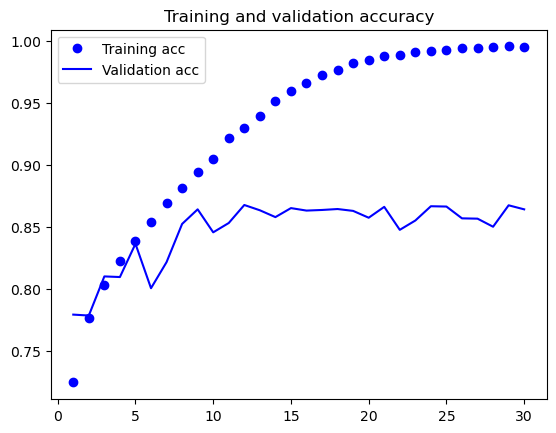

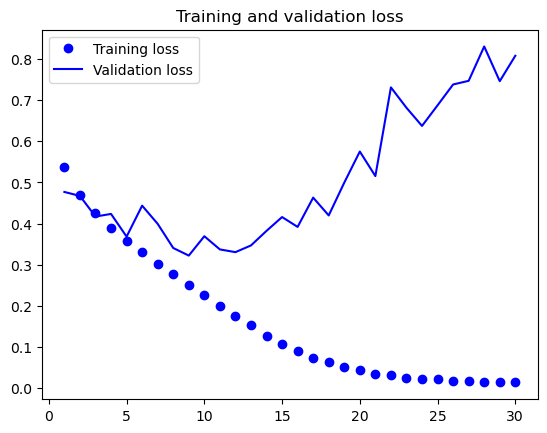

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

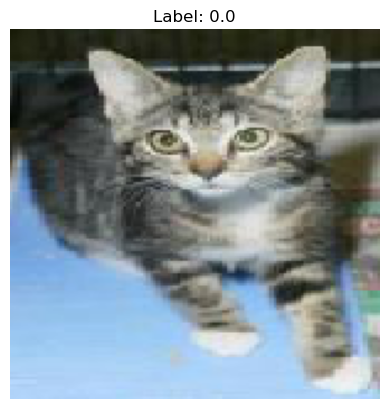

In [ ]:
images, labels = next(train_generator)
img1, lbl1 = images[0], labels[0]

plt.imshow(img1)  
plt.title(f'Label: {lbl1}')
plt.axis('off')
plt.show()

In [61]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
from keras.utils.image_utils import load_img, img_to_array, array_to_img

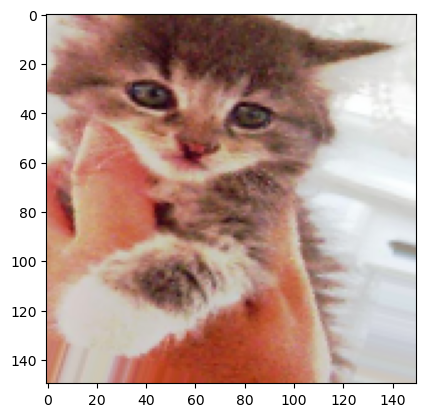

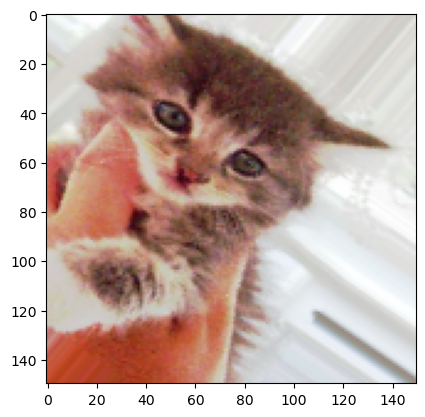

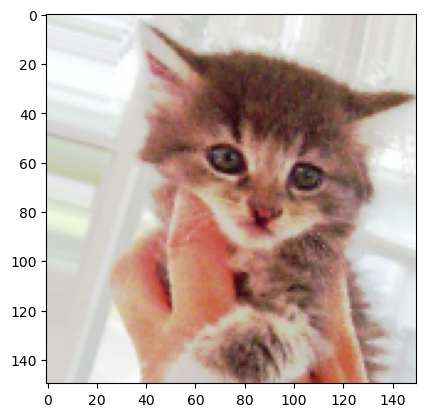

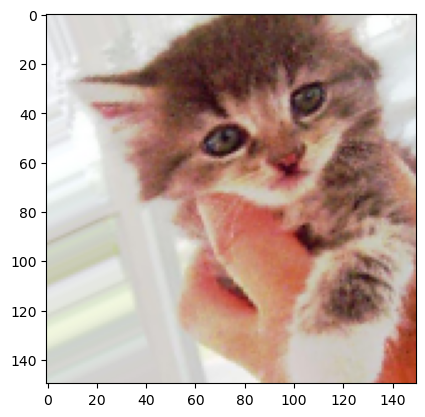

In [ ]:
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
from keras import regularizers

In [22]:
new_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01),
                  input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1, activation='sigmoid')
])

new_model.compile(loss='binary_crossentropy',
                   optimizer=optimizers.RMSprop(lr=1e-4),
                   metrics=['acc'])

In [10]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 15999 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [42]:
history = new_model.fit(
    train_generator,
    steps_per_epoch=800,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=200
)

Epoch 1/100
800/800 [==============================] - ETA: 0s - loss: 0.6480 - acc: 0.7205

d:\anaconda3\envs\MachineLearning\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


800/800 [==============================] - 385s 481ms/step - loss: 0.6480 - acc: 0.7205 - val_loss: 0.5787 - val_acc: 0.7740
Epoch 2/100
800/800 [==============================] - 210s 262ms/step - loss: 0.6286 - acc: 0.7326 - val_loss: 0.5603 - val_acc: 0.7812
Epoch 3/100
800/800 [==============================] - 209s 261ms/step - loss: 0.6133 - acc: 0.7384 - val_loss: 0.5573 - val_acc: 0.7795
Epoch 4/100
800/800 [==============================] - 207s 258ms/step - loss: 0.5945 - acc: 0.7512 - val_loss: 0.5511 - val_acc: 0.7835
Epoch 5/100
800/800 [==============================] - 208s 260ms/step - loss: 0.5865 - acc: 0.7600 - val_loss: 0.5000 - val_acc: 0.8138
Epoch 6/100
800/800 [==============================] - 208s 260ms/step - loss: 0.5756 - acc: 0.7590 - val_loss: 0.5324 - val_acc: 0.7935
Epoch 7/100
800/800 [==============================] - 209s 261ms/step - loss: 0.5689 - acc: 0.7672 - val_loss: 0.5170 - val_acc: 0.7865
Epoch 8/100
800/800 [==============================] 

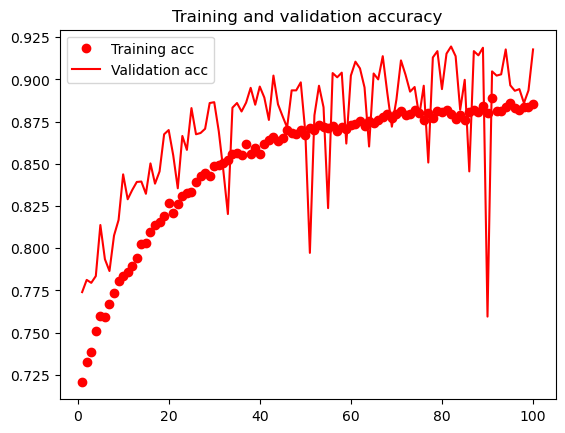

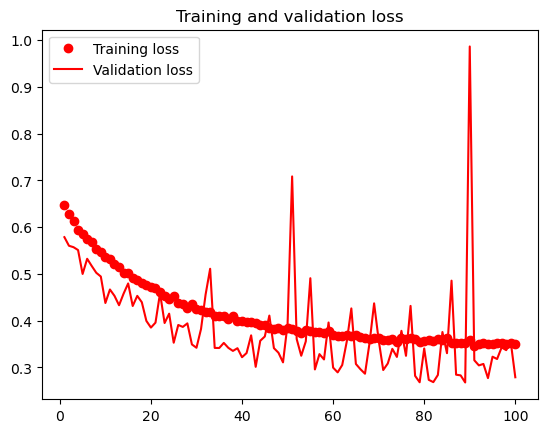

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [29]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [44]:
callbacks_final = [
    EarlyStopping(
        monitor='acc',
        patience=8,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='acc',
        factor=0.8,
        patience=3,
        min_lr=1e-6
    )
]

In [46]:
def combined_generator(gen1, gen2):
    while True:
        for x, y in gen1:
            yield x, y
        for x, y in gen2:
            yield x, y

merged_gen = combined_generator(train_generator, validation_generator)

total_steps = train_generator.samples // train_generator.batch_size \
            + validation_generator.samples // validation_generator.batch_size

history = new_model.fit(
    merged_gen,
    steps_per_epoch=total_steps,
    epochs=60,
    callbacks=callbacks_final
)

Epoch 1/60
999/999 [==============================] - 254s 254ms/step - loss: 0.2703 - acc: 0.9160 - lr: 2.6214e-05
Epoch 2/60
999/999 [==============================] - 269s 270ms/step - loss: 0.2681 - acc: 0.9166 - lr: 2.6214e-05
Epoch 3/60
999/999 [==============================] - 272s 272ms/step - loss: 0.2667 - acc: 0.9163 - lr: 2.6214e-05
Epoch 4/60
999/999 [==============================] - 243s 243ms/step - loss: 0.2673 - acc: 0.9200 - lr: 2.6214e-05
Epoch 5/60
999/999 [==============================] - 241s 241ms/step - loss: 0.2672 - acc: 0.9169 - lr: 2.6214e-05
Epoch 6/60
999/999 [==============================] - 240s 240ms/step - loss: 0.2667 - acc: 0.9160 - lr: 2.6214e-05
Epoch 7/60
999/999 [==============================] - 240s 241ms/step - loss: 0.2637 - acc: 0.9180 - lr: 2.6214e-05
Epoch 8/60
999/999 [==============================] - 240s 240ms/step - loss: 0.2606 - acc: 0.9201 - lr: 2.0972e-05
Epoch 9/60
999/999 [==============================] - 241s 241ms/step - 

In [47]:
new_model.save('cats_and_dogs_2.h5')

In [54]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

results = new_model.evaluate(test_generator, 
                         steps=test_generator.samples//test_generator.batch_size,
                         verbose = 1)

for name, score in zip(model.metrics_names, results):
    print(f"{name}: {score:.5f}")

Found 4999 images belonging to 2 classes.
249/249 [==============================] - 18s 71ms/step - loss: 0.2475 - acc: 0.9367
loss: 0.24752
acc: 0.93675


In [55]:
import numpy as np

In [57]:
img_path = r'D:\Python\Keras. Deep Learning\cats_and_dogs_small\test\cats\10002.jpg'

img = load_img(img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)


(1, 150, 150, 3)


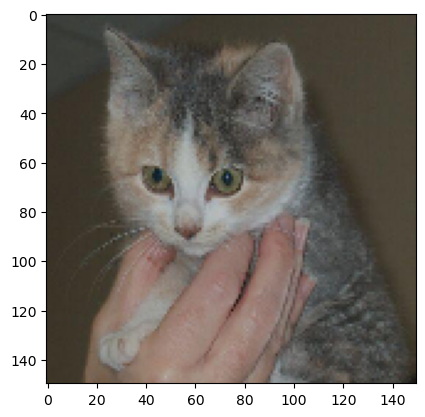

In [58]:
plt.imshow(img_tensor[0])
plt.show()

In [59]:
# Извлечение вывода верхних восьми слоёв
layer_outputs = [layer.output for  layer in new_model.layers[:8]] 
# Создание модели, которая вернёт эти выводы с учётом заданного входа
activation_model = models.Model(inputs=new_model.input, outputs=layer_outputs)

In [60]:
# Вернёт список с пятью массивами Numpy: 
# по одному на каждую активацию слоя 
activations = activation_model.predict(img_tensor)

# Активация первого свёрточного слоя для входного изображения кошки: 
first_layer_activation = activations[0]
print(first_layer_activation.shape)

1/1 [==============================] - 0s 147ms/step
(1, 148, 148, 32)


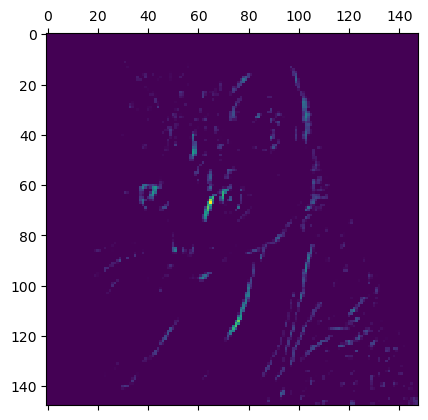

In [61]:
# Визуализация четвёртого канала 
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

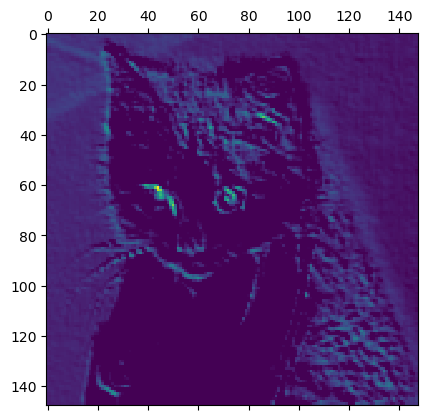

In [62]:
# Визуализация седьмого канала 
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

C:\Users\User\AppData\Local\Temp\ipykernel_3420\1593324750.py:21: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
C:\Users\User\AppData\Local\Temp\ipykernel_3420\1593324750.py:24: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0,  255).astype('uint8')


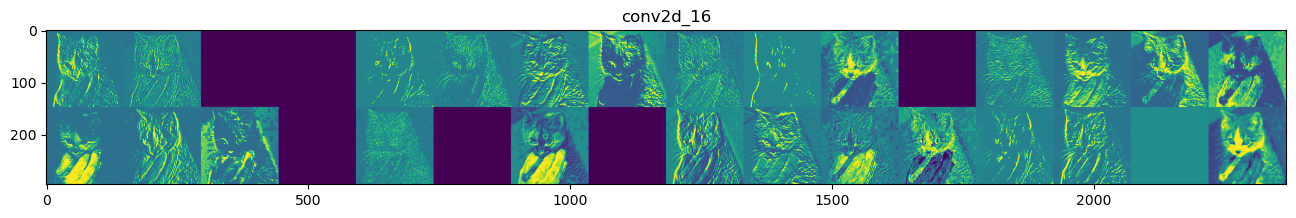

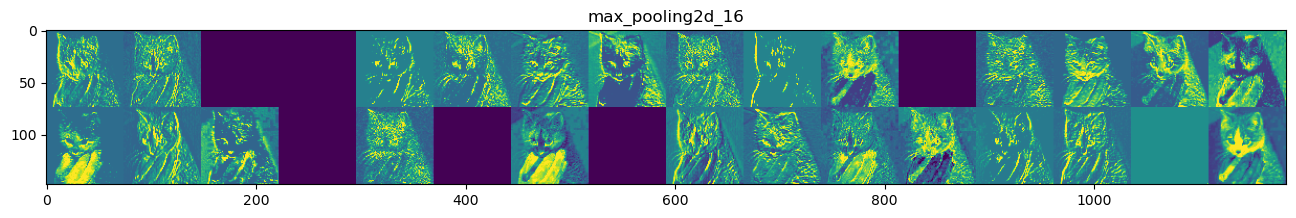

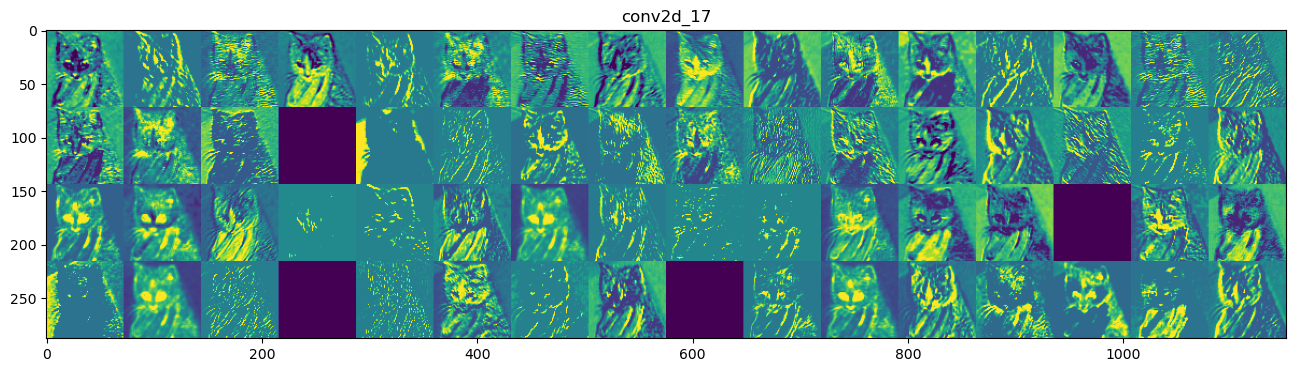

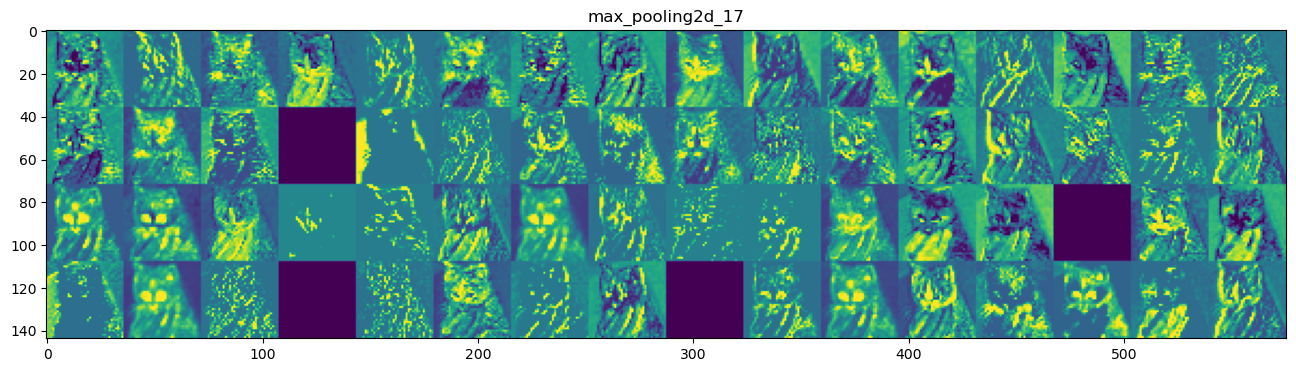

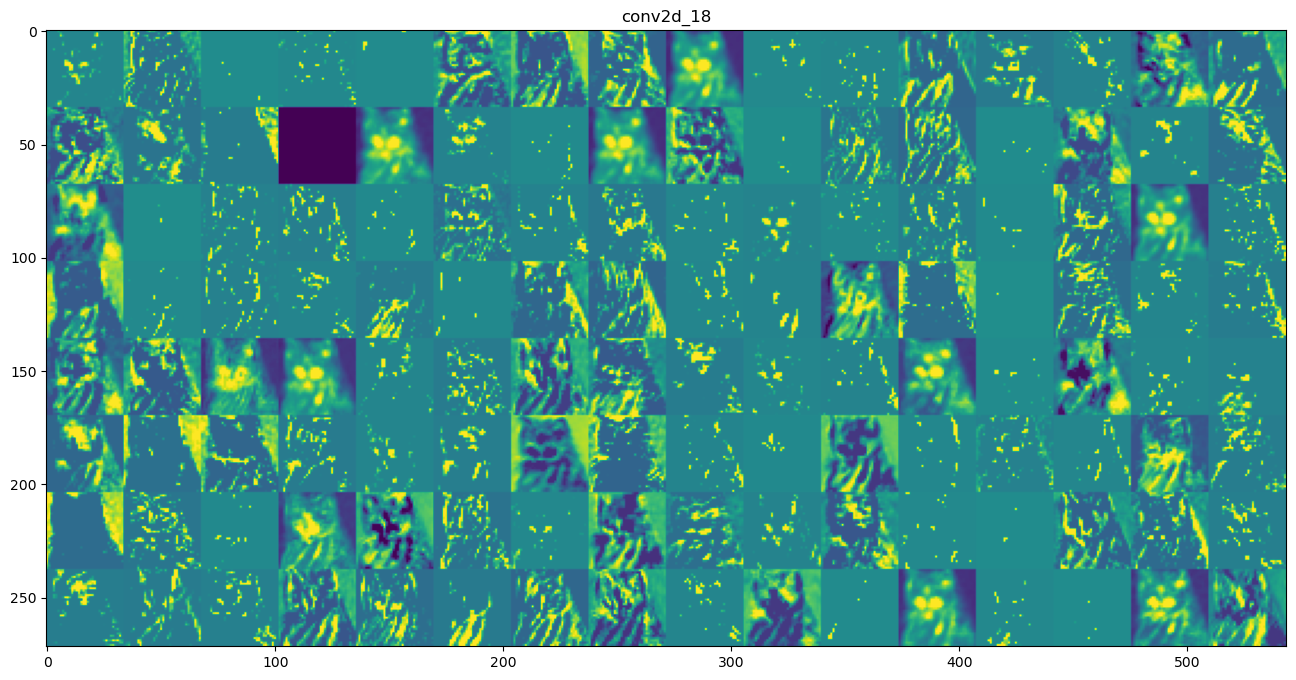

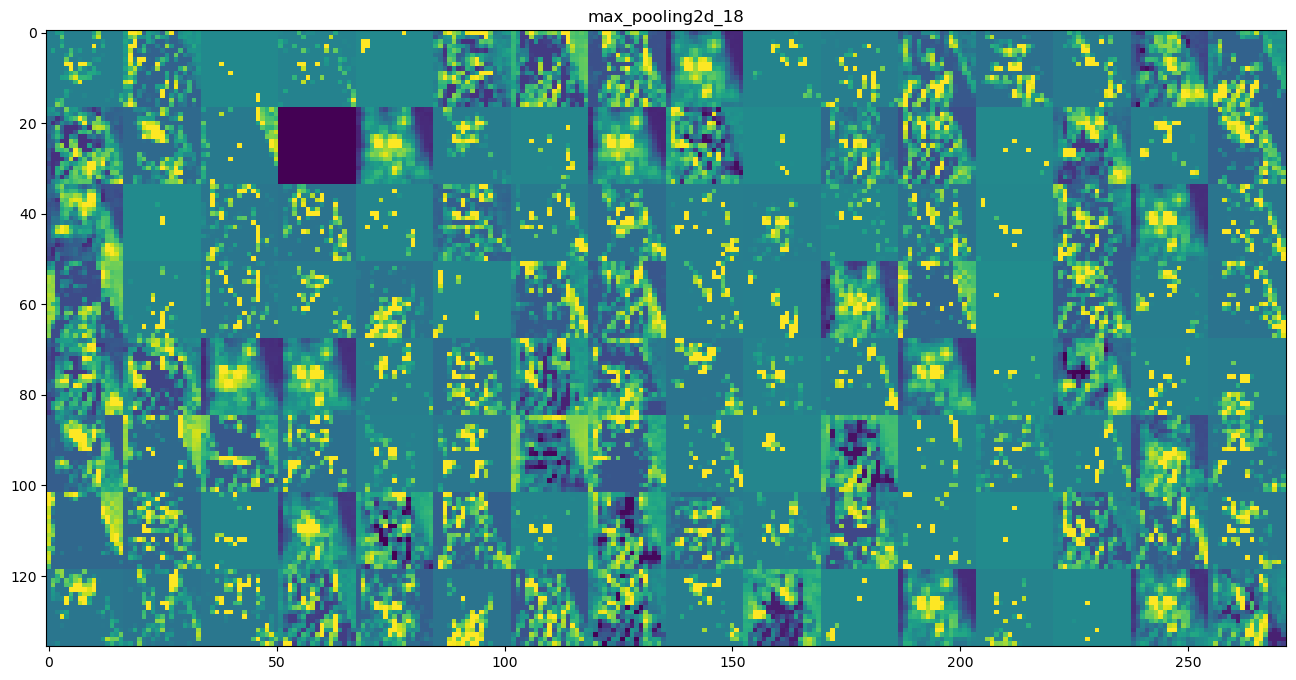

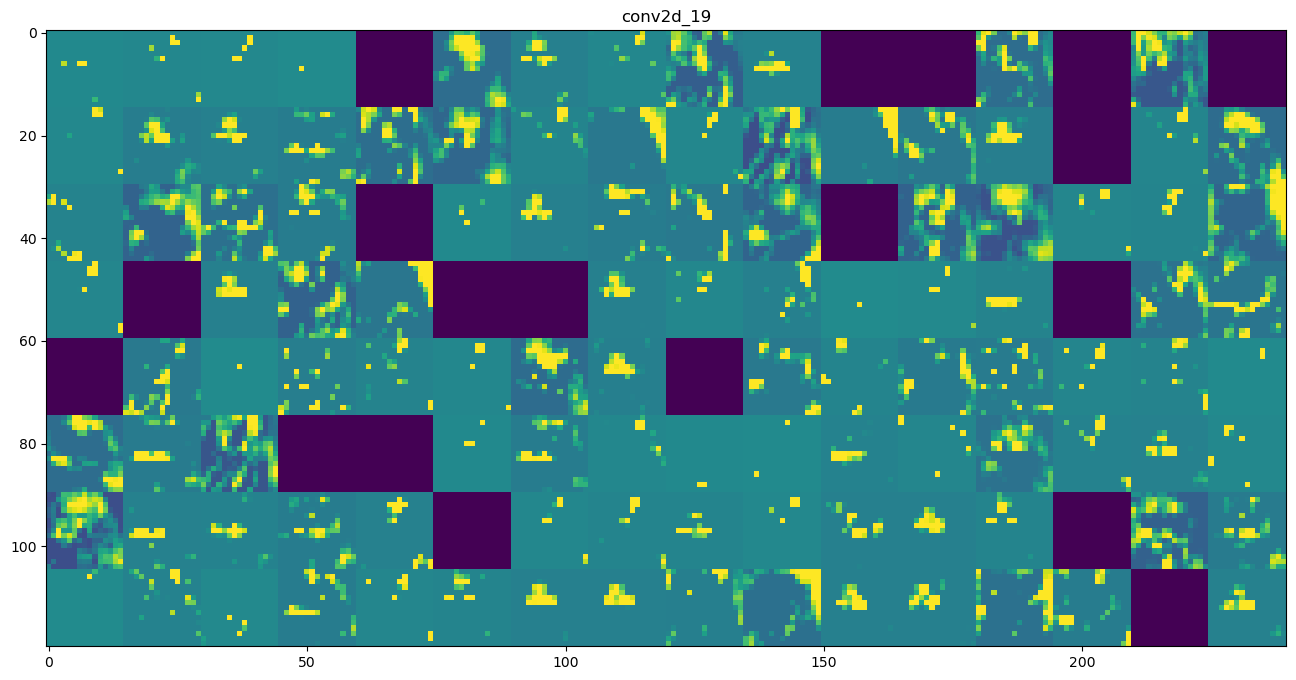

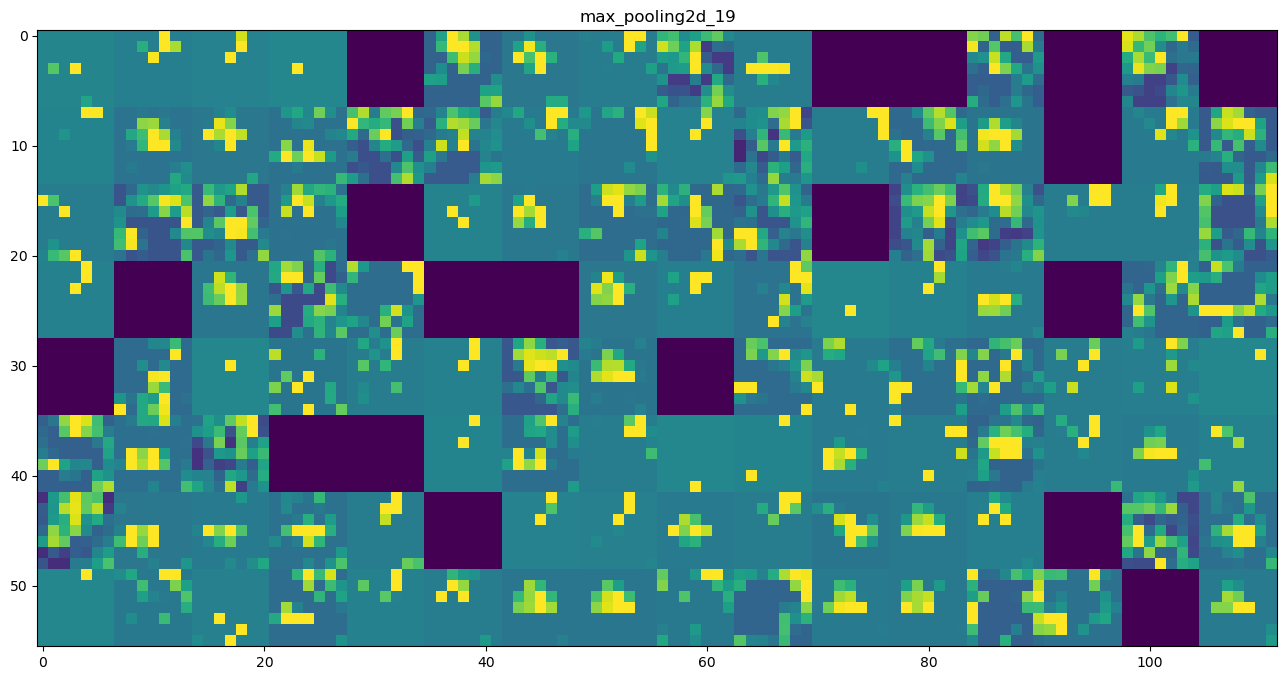

In [63]:
# Визуализация всех каналов для промежуточных активаций 
# Карта признаков имеет форму (1, size, size, n_features)
layer_names = []
for layer in new_model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    # Кол-во колонок в матрице отображения каналов
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size*n_cols, images_per_row*size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0,  255).astype('uint8')
            display_grid[col*size : (col+1)*size, 
                         row*size : (row+1)*size] = channel_image
            
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                         scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap = 'viridis')